## खाना प्रकार वर्गीकरण १

यस पाठमा, हामी विभिन्न प्रकारका वर्गीकरणकर्ता (classifiers) को अध्ययन गर्नेछौं जसले *दिइएको सामग्रीहरूको समूहको आधारमा कुनै राष्ट्रिय खाना प्रकारको भविष्यवाणी गर्न सक्छ।* यस क्रममा, हामी वर्गीकरण कार्यहरूको लागि प्रयोग गर्न सकिने केही एल्गोरिदमहरूको बारेमा थप जान्नेछौं।

### [**पाठ अघि क्विज**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **तयारी**

यो पाठ हाम्रो [अघिल्लो पाठ](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) मा आधारित छ, जहाँ हामीले:

-   एशिया र भारतका सबै अद्भुत खानाहरूको डेटासेट प्रयोग गरेर वर्गीकरणको कोमल परिचय गराएका थियौं 😋।

-   हाम्रो डेटा तयार गर्न र सफा गर्न [dplyr verbs](https://dplyr.tidyverse.org/) को अध्ययन गरेका थियौं।

-   ggplot2 प्रयोग गरेर सुन्दर भिजुअलाइजेसनहरू बनाएका थियौं।

-   असन्तुलित डेटासँग कसरी व्यवहार गर्ने भनेर [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) प्रयोग गरेर पूर्वप्रक्रिया गर्ने तरिका देखाएका थियौं।

-   हाम्रो recipe `prep` र `bake` गरेर यो अपेक्षाअनुसार काम गर्नेछ भनेर पुष्टि गर्ने तरिका देखाएका थियौं।

#### **पूर्वआवश्यकता**

यस पाठका लागि, हामीलाई हाम्रो डेटा सफा गर्न, तयार गर्न र भिजुअलाइज गर्न निम्न प्याकेजहरू आवश्यक हुनेछ:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) [R प्याकेजहरूको संग्रह](https://www.tidyverse.org/packages) हो, जसले डेटा विज्ञानलाई छिटो, सजिलो र रमाइलो बनाउँछ!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) फ्रेमवर्क [मोडलिङ र मेसिन लर्निङका लागि प्याकेजहरूको संग्रह](https://www.tidymodels.org/packages/) हो।

-   `themis`: [themis प्याकेज](https://themis.tidymodels.org/) ले असन्तुलित डेटासँग व्यवहार गर्न अतिरिक्त recipes steps प्रदान गर्दछ।

-   `nnet`: [nnet प्याकेज](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ले एकल लुकेको तह भएको फीड-फर्वर्ड न्यूरल नेटवर्कहरू र बहुपरिमाणीय लजिस्टिक रिग्रेसन मोडेलहरूको अनुमान गर्नका लागि कार्यहरू प्रदान गर्दछ।

तपाईं यी प्याकेजहरू यसरी इन्स्टल गर्न सक्नुहुन्छ:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

वैकल्पिक रूपमा, तलको स्क्रिप्टले जाँच गर्दछ कि यो मोड्युल पूरा गर्न आवश्यक प्याकेजहरू तपाईंसँग छन् कि छैनन्, र यदि तिनीहरू छैनन् भने तिनीहरूलाई तपाईँको लागि इन्स्टल गर्दछ।


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## १. डेटा प्रशिक्षण र परीक्षण सेटहरूमा विभाजन गर्नुहोस्।

हामी हाम्रो अघिल्लो पाठबाट केही चरणहरू चयन गरेर सुरु गर्नेछौं।

### फरक-फरक परिकारहरू बीच भ्रम सिर्जना गर्ने सबैभन्दा सामान्य सामग्रीहरू हटाउनुहोस्, `dplyr::select()` प्रयोग गरेर।

सबैलाई चामल, लसुन र अदुवा मन पर्छ!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


अब, डेटालाई यसरी विभाजन गरौं कि ७०% डेटा प्रशिक्षणको लागि जाओस् र ३०% परीक्षणको लागि। हामीले `stratification` प्रविधि पनि लागू गर्नेछौं ताकि `प्रत्येक खानाको अनुपात` प्रशिक्षण र परीक्षण डेटासेटमा समान रहोस्।

[rsample](https://rsample.tidymodels.org/), Tidymodels को एक प्याकेज, डेटा विभाजन र पुन: नमूना गर्नको लागि प्रभावकारी संरचना प्रदान गर्दछ:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## 2. असन्तुलित डाटासँग व्यवहार गर्ने

जसरी तपाईंले मूल डाटा सेट र हाम्रो प्रशिक्षण सेटमा देख्नुभएको छ, त्यहाँ खानाका प्रकारहरूको संख्यामा धेरै असमान वितरण छ। कोरियन खानाहरू *लगभग* थाई खानाहरूको तीन गुणा छन्। असन्तुलित डाटाले मोडेलको प्रदर्शनमा नकारात्मक प्रभाव पार्न सक्छ। धेरै मोडेलहरू तब राम्रो प्रदर्शन गर्छन् जब अवलोकनहरूको संख्या समान हुन्छ, र त्यसैले असन्तुलित डाटासँग संघर्ष गर्न सक्छन्।

असन्तुलित डाटासँग व्यवहार गर्नका लागि मुख्यत: दुई तरिकाहरू छन्:

-   अल्पसंख्यक वर्गमा अवलोकनहरू थप्ने: `Over-sampling` जस्तै SMOTE एल्गोरिदम प्रयोग गरेर, जसले यी केसहरूको नजिकका छिमेकीहरूको प्रयोग गरी अल्पसंख्यक वर्गका नयाँ उदाहरणहरू कृत्रिम रूपमा सिर्जना गर्छ।

-   बहुसंख्यक वर्गबाट अवलोकनहरू हटाउने: `Under-sampling`

हाम्रो अघिल्लो पाठमा, हामीले `recipe` प्रयोग गरेर असन्तुलित डाटासँग कसरी व्यवहार गर्ने भनेर देखाएका थियौं। `recipe` लाई एउटा खाका जस्तै सोच्न सकिन्छ, जसले डाटा सेटलाई डाटा विश्लेषणको लागि तयार पार्न के कदमहरू लागू गर्नुपर्छ भनेर वर्णन गर्छ। हाम्रो केसमा, हामी हाम्रो `training set` का लागि खानाका प्रकारहरूको संख्यामा समान वितरण चाहन्छौं। अब यसमा लागौं।


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

तपाईं निश्चय गर्न सक्नुहुन्छ (prep + bake प्रयोग गरेर) कि यो रेसिपी तपाईंले अपेक्षा गरेजस्तै काम गर्नेछ - सबै खाना प्रकारका लेबलहरूमा `559` अवलोकनहरू छन्।

किनभने हामी यो रेसिपीलाई मोडलिङको लागि प्रिप्रोसेसरको रूपमा प्रयोग गर्दैछौं, `workflow()` ले सबै prep र bake प्रक्रिया गर्नेछ, त्यसैले हामीलाई रेसिपीलाई म्यानुअली अनुमान गर्न आवश्यक पर्नेछैन।

अब हामी मोडल प्रशिक्षण गर्न तयार छौं 👩‍💻👨‍💻!

## ३. तपाईंको वर्गीकरणकर्ता चयन गर्दै

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>कलाकृति @allison_horst द्वारा</figcaption>


अब हामीले यो कामका लागि कुन एल्गोरिदम प्रयोग गर्ने निर्णय गर्नुपर्छ 🤔।

Tidymodels मा, [`parsnip package`](https://parsnip.tidymodels.org/index.html) ले विभिन्न इन्जिनहरू (प्याकेजहरू) मा आधारित मोडेलहरूसँग काम गर्नको लागि एक समान इन्टरफेस प्रदान गर्दछ। कृपया [मोडेल प्रकारहरू र इन्जिनहरू](https://www.tidymodels.org/find/parsnip/#models) र तिनीहरूको [मोडेल आर्गुमेन्टहरू](https://www.tidymodels.org/find/parsnip/#model-args) अन्वेषण गर्न parsnip को डकुमेन्टेशन हेर्नुहोस्। सुरुमा यो विविधता अलि झन्झटिलो लाग्न सक्छ। उदाहरणका लागि, निम्न विधिहरू सबै वर्गीकरण प्रविधिहरू समावेश गर्छन्:

-   C5.0 नियम-आधारित वर्गीकरण मोडेलहरू

-   लचिलो भेदभाव मोडेलहरू

-   रेखीय भेदभाव मोडेलहरू

-   नियमित भेदभाव मोडेलहरू

-   लजिस्टिक रिग्रेसन मोडेलहरू

-   बहु-वर्गीय रिग्रेसन मोडेलहरू

-   नाइव बेज मोडेलहरू

-   समर्थन भेक्टर मेसिनहरू

-   नजिकको छिमेकीहरू

-   निर्णय रुखहरू

-   समुच्चय विधिहरू

-   न्यूरल नेटवर्कहरू

सूची अझै जारी छ!

### **कुन वर्गीकरणकर्ता रोज्ने?**

त्यसोभए, कुन वर्गीकरणकर्ता रोज्ने? प्रायः, धेरै विधिहरू चलाएर राम्रो नतिजा खोज्नु परीक्षण गर्ने एउटा तरिका हो।

> AutoML ले यो समस्यालाई सजिलै समाधान गर्छ, यी तुलना क्लाउडमा चलाएर तपाईंलाई तपाईंको डाटाका लागि सबैभन्दा उपयुक्त एल्गोरिदम छान्न अनुमति दिन्छ। यसलाई [यहाँ](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott) प्रयास गर्नुहोस्।

त्यसैगरी, वर्गीकरणकर्ताको छनोट हाम्रो समस्यामा निर्भर गर्दछ। उदाहरणका लागि, जब नतिजा `दुई भन्दा बढी वर्गहरू` मा वर्गीकृत गर्न सकिन्छ, हाम्रो केसमा जस्तै, तपाईंले `बहु-वर्गीय वर्गीकरण एल्गोरिदम` प्रयोग गर्नुपर्छ, `द्विआधारी वर्गीकरण` को सट्टा।

### **एक राम्रो दृष्टिकोण**

तर, अन्धाधुन्ध अनुमान लगाउनेभन्दा राम्रो तरिका भनेको यो डाउनलोड गर्न मिल्ने [ML Cheat Sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) मा दिइएका विचारहरू पछ्याउनु हो। यहाँ, हामी पत्ता लगाउँछौं कि हाम्रो बहु-वर्गीय समस्याका लागि, हामीसँग केही विकल्पहरू छन्:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>माइक्रोसफ्टको एल्गोरिदम चीट शीटको एक खण्ड, जसले बहु-वर्गीय वर्गीकरण विकल्पहरू देखाउँछ</figcaption>


### **तर्क**

हामीसँग भएका सीमाहरूलाई ध्यानमा राख्दै, विभिन्न दृष्टिकोणहरूको बारेमा सोचौं:

-   **डिप न्यूरल नेटवर्कहरू धेरै भारी छन्।** हाम्रो सानो, तर सफा डेटासेटलाई ध्यानमा राख्दै, र तथ्य यो हो कि हामी स्थानीय रूपमा नोटबुकहरू प्रयोग गरेर प्रशिक्षण गर्दैछौं, डिप न्यूरल नेटवर्कहरू यो कार्यका लागि धेरै भारी हुनेछन्।

-   **दुई-वर्ग वर्गीकरणकर्ता प्रयोग गरिँदैन।** हामी दुई-वर्ग वर्गीकरणकर्ता प्रयोग गर्दैनौं, त्यसैले one-vs-all विधि उपयुक्त हुँदैन।

-   **डिसिजन ट्री वा लजिस्टिक रिग्रेसन उपयुक्त हुन सक्छ।** डिसिजन ट्री उपयुक्त हुन सक्छ, वा बहुवर्गीय डेटाका लागि बहुवर्गीय रिग्रेसन/लजिस्टिक रिग्रेसन।

-   **बहुवर्गीय बुस्टेड डिसिजन ट्री फरक समस्या समाधान गर्न डिजाइन गरिएको छ।** बहुवर्गीय बुस्टेड डिसिजन ट्री गैर-प्यारामेट्रिक कार्यहरूको लागि उपयुक्त छ, जस्तै रैंकिङ निर्माण गर्ने कार्यहरू, त्यसैले यो हाम्रो लागि उपयोगी छैन।

सामान्यतया, जटिल मेसिन लर्निङ मोडेलहरू (जस्तै, एन्सेम्बल विधिहरू) सुरु गर्नु अघि, सबैभन्दा साधारण मोडेल निर्माण गरेर के भइरहेको छ भन्ने बुझ्न राम्रो हुन्छ। त्यसैले यस पाठका लागि, हामी `multinomial regression` मोडेलबाट सुरु गर्नेछौं।

> लजिस्टिक रिग्रेसन एउटा प्रविधि हो जुन परिणाम चर श्रेणीगत (वा नाममात्र) हुँदा प्रयोग गरिन्छ। बाइनरी लजिस्टिक रिग्रेसनमा परिणाम चरहरूको संख्या दुई हुन्छ, जबकि बहुवर्गीय लजिस्टिक रिग्रेसनमा परिणाम चरहरूको संख्या दुईभन्दा बढी हुन्छ। थप जानकारीका लागि [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) हेर्नुहोस्।

## ४. बहुवर्गीय लजिस्टिक रिग्रेसन मोडेल प्रशिक्षण र मूल्याङ्कन गर्नुहोस्।

Tidymodels मा, `parsnip::multinom_reg()` ले एउटा मोडेल परिभाषित गर्छ जसले रेखीय भविष्यवक्ताहरू प्रयोग गरेर बहुवर्गीय डाटालाई बहुवर्गीय वितरणको आधारमा भविष्यवाणी गर्छ। यो मोडेल फिट गर्न प्रयोग गर्न सकिने विभिन्न तरिकाहरू/इन्जिनहरूको लागि `?multinom_reg()` हेर्नुहोस्।

यस उदाहरणका लागि, हामी डिफल्ट [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) इन्जिन प्रयोग गरेर बहुवर्गीय रिग्रेसन मोडेल फिट गर्नेछौं।

> मैले `penalty` को मान अलि अनियमित रूपमा चयन गरेको छु। यो मान चयन गर्नका लागि अझ राम्रो तरिकाहरू छन्, जस्तै `resampling` र मोडेललाई `tuning` गरेर, जुन हामी पछि छलफल गर्नेछौं।
>
> यदि तपाईँ मोडेल हाइपरप्यारामिटरहरू ट्युन गर्ने बारे थप जान्न चाहनुहुन्छ भने [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) हेर्नुहोस्।


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


शानदार काम 🥳! अब हामीसँग एउटा रेसिपी र मोडेल निर्दिष्टीकरण छ, हामीलाई यी दुईलाई एकसाथ बाँधेर एउटा वस्तुमा राख्ने तरिका खोज्नुपर्छ, जसले पहिले डाटालाई पूर्वप्रक्रिया गर्नेछ, त्यसपछि पूर्वप्रक्रिया गरिएको डाटामा मोडेललाई फिट गर्नेछ, र सम्भावित पछिल्लो-प्रक्रिया गतिविधिहरूको लागि पनि अनुमति दिनेछ। Tidymodels मा, यो सुविधाजनक वस्तुलाई [`workflow`](https://workflows.tidymodels.org/) भनिन्छ, जसले तपाईका मोडेलिङ कम्पोनेन्टहरूलाई सजिलै समेट्छ! यसलाई हामी *Python* मा *pipelines* भन्थ्यौं।

अब सबै कुरा workflow मा बाँधौं!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


वर्कफ्लोहरू 👌👌! एक **`workflow()`** लाई मोडेल जस्तै फिट गर्न सकिन्छ। त्यसैले, मोडेल प्रशिक्षण गर्ने समय हो!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

मोडेलले प्रशिक्षणको क्रममा सिकेका गुणांकहरू देखाउँछ।

### प्रशिक्षित मोडेलको मूल्यांकन गर्नुहोस्

अब मोडेलले कसरी प्रदर्शन गर्‍यो भनेर परीक्षण सेटमा मूल्यांकन गर्ने समय आएको छ 📏! परीक्षण सेटमा भविष्यवाणीहरू गरेर सुरु गरौं।


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


धेरै राम्रो काम! Tidymodels मा, मोडेलको प्रदर्शन मूल्याङ्कन [yardstick](https://yardstick.tidymodels.org/) प्रयोग गरेर गर्न सकिन्छ - प्रदर्शन मेट्रिक्स प्रयोग गरेर मोडेलहरूको प्रभावकारिता मापन गर्न प्रयोग गरिने एक प्याकेज। हाम्रो logistic regression पाठमा जस्तै, आउनुस् एक confusion matrix गणना गरेर सुरु गरौं।


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

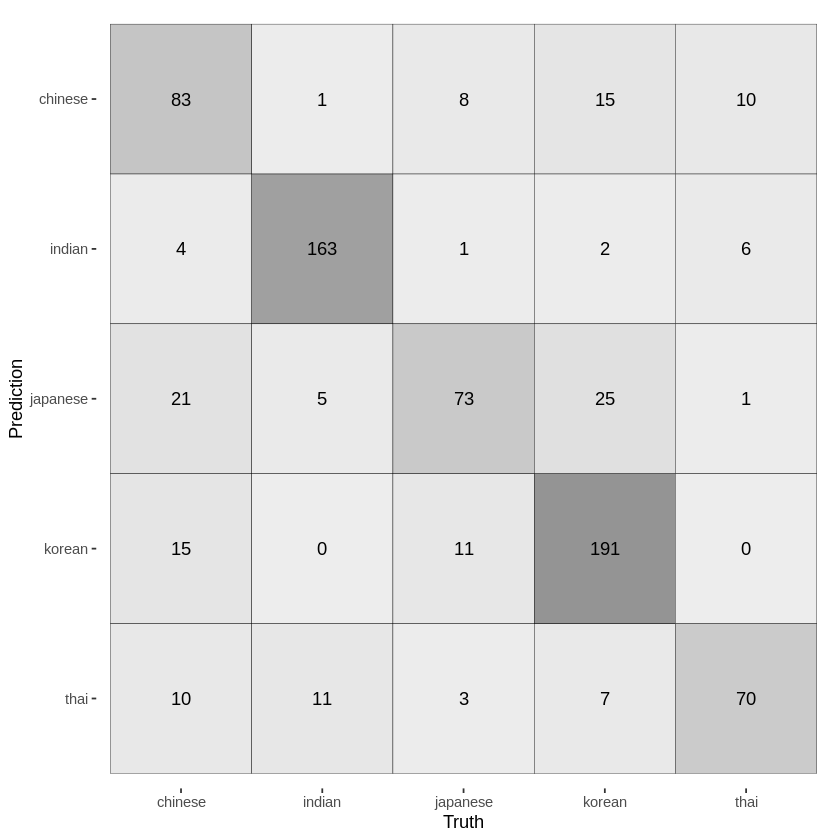

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

कन्फ्युजन म्याट्रिक्स प्लटमा गाढा वर्गहरूले धेरै केसहरूको सङ्ख्या देखाउँछन्, र तपाईंले सम्भवतः गाढा वर्गहरूको एक तिर्यक रेखा देख्न सक्नुहुन्छ जसले भविष्यवाणी गरिएको र वास्तविक लेबल समान भएको केसहरू संकेत गर्दछ।

अब कन्फ्युजन म्याट्रिक्सको लागि सारांश तथ्याङ्कहरू गणना गरौं।


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


यदि हामी केही मेट्रिक्सहरू जस्तै शुद्धता, संवेदनशीलता, ppv मा सीमित हुन्छौं भने, सुरुवातका लागि हामी धेरै नराम्रो अवस्थामा छैनौं 🥳!

## ४. गहिराइमा जानुहोस्

अब एउटा सूक्ष्म प्रश्न सोधौं: कुन प्रकारको खाना भविष्यवाणी गरिएको नतिजाको रूपमा चयन गर्न के मापदण्ड प्रयोग गरिन्छ?

खैर, सांख्यिकीय मेसिन लर्निङ एल्गोरिथमहरू, जस्तै logistic regression, `संभाव्यता` मा आधारित हुन्छन्; त्यसैले वास्तवमा क्लासिफायरले भविष्यवाणी गर्ने कुरा सम्भावनाको वितरण हो जुन सम्भावित नतिजाहरूको सेटमा आधारित हुन्छ। सबैभन्दा उच्च सम्भावना भएको वर्गलाई दिइएको अवलोकनहरूको लागि सबैभन्दा सम्भावित नतिजा भनेर चयन गरिन्छ।

अब यसलाई व्यवहारमा हेर्नुहोस्, जहाँ हामी कडा वर्ग भविष्यवाणीहरू र सम्भावनाहरू दुवै बनाउँछौं।


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


किन मोडेललाई पहिलो अवलोकन थाई हो भन्ने कुरामा यति धेरै विश्वास छ भनेर तपाईं स्पष्ट गर्न सक्नुहुन्छ?

## **🚀चुनौती**

यस पाठमा, तपाईंले आफ्नो सफा गरिएको डाटाको प्रयोग गरेर एउटा मेसिन लर्निङ मोडेल निर्माण गर्नुभयो, जसले सामग्रीहरूको श्रृंखलाको आधारमा राष्ट्रिय भोजनको भविष्यवाणी गर्न सक्छ। Tidymodels ले डाटा वर्गीकरण गर्नका लागि प्रदान गर्ने [धेरै विकल्पहरू](https://www.tidymodels.org/find/parsnip/#models) र बहु-परिणामीय प्रतिगमन फिट गर्नका लागि [अन्य तरिकाहरू](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) पढ्न केही समय दिनुहोस्।

#### धन्यवाद:

[`एलिसन होर्स्ट`](https://twitter.com/allison_horst/) लाई, जसले R लाई अझ स्वागतयोग्य र आकर्षक बनाउनका लागि अद्भुत चित्रणहरू सिर्जना गर्नुभयो। थप चित्रणहरू उनको [ग्यालरी](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) मा फेला पार्न सकिन्छ।

[Cassie Breviu](https://www.twitter.com/cassieview) र [Jen Looper](https://www.twitter.com/jenlooper) लाई यस मोड्युलको मूल Python संस्करण सिर्जना गर्नका लागि ♥️

<br>
केही ठट्टा थप्ने सोच्दै थिएँ, तर मलाई खाना सम्बन्धी ठट्टा बुझ्न गाह्रो लाग्छ 😅।

<br>

सिकाइमा रमाउनुहोस्,

[Eric](https://twitter.com/ericntay), गोल्ड माइक्रोसफ्ट लर्न स्टुडेन्ट एम्बेसडर।



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरेर अनुवाद गरिएको छ। हामी शुद्धताको लागि प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटि वा अशुद्धता हुन सक्छ। यसको मूल भाषा मा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्वपूर्ण जानकारीको लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याको लागि हामी जिम्मेवार हुने छैनौं।
